# STEP #1: LIBRARIES IMPORT

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #2: IMPORT DATASET 

In [4]:
IceCream = pd.read_csv("SalesData.csv")

In [5]:
IceCream.head(100)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
95,9.018860,212.591740
96,20.265012,474.749392
97,19.363153,460.402500
98,14.685944,343.362905


In [6]:
IceCream.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [7]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [8]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# STEP #3: VISUALIZE DATASET

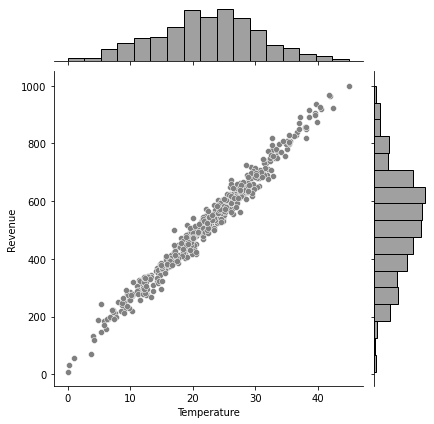

In [16]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream, color = 'gray')

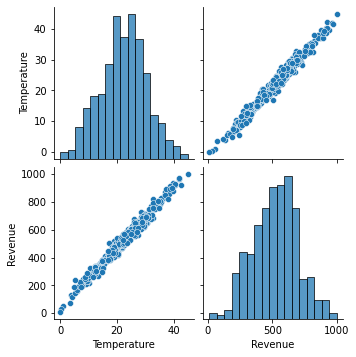

In [17]:
sns.pairplot(IceCream)

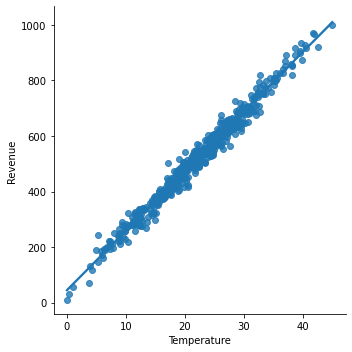

In [18]:
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)

# STEP #4: CREATE TESTING AND TRAINING DATASET

In [19]:
y = IceCream['Revenue']

In [24]:
x = IceCream[['Temperature']]

In [25]:
x

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [26]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# STEP #5: TRAIN THE MODEL

In [29]:
x_train.shape

(375, 1)

In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
regressor = LinearRegression(fit_intercept = True)

In [34]:
regressor.fit(x_train,y_train)

LinearRegression()

In [35]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.49299064]
Linear Model Coefficient (b):  44.045481527646814


# STEP #6: TEST THE MODEL

In [36]:
y_predict = regressor.predict(x_test)
y_predict

array([520.96453885, 693.73782968, 864.75961373, 677.31036038,
       304.60530817, 832.89352055, 368.98073975, 554.74980134,
       641.13149789, 441.30345781, 745.79025487, 360.67644159,
       710.98013372, 593.2171846 , 469.07256765, 662.77356369,
       742.13339725, 623.14484021, 573.10057564, 586.26578659,
       530.49584584, 468.06086636, 360.84250589, 411.37454529,
       606.49252607, 749.12373841, 631.28390907, 525.22203915,
       461.72452079, 526.52086423, 291.29004863, 874.29526015,
       686.25545895, 422.07219564, 571.66737789, 745.42319629,
       525.44499755, 637.23195732, 473.42099942, 610.81020374,
       521.72982665, 458.1678132 , 449.84079609, 666.43383719,
       430.76929669, 169.96118444, 440.37583409, 726.18829041,
       592.10994568, 830.02512921, 201.7061324 , 644.373685  ,
       562.31878732, 396.65993645, 557.33516868, 604.54839738,
       415.06137876, 413.71266995, 380.65718713, 622.71428467,
       695.9350162 , 527.26805429, 284.50383414, 283.32

In [38]:
y_test

288    496.461363
418    679.712058
348    856.303304
79     682.752869
462    297.025414
          ...    
170    540.977511
369    545.903929
351    216.183462
389    819.117588
337    571.764273
Name: Revenue, Length: 125, dtype: float64

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

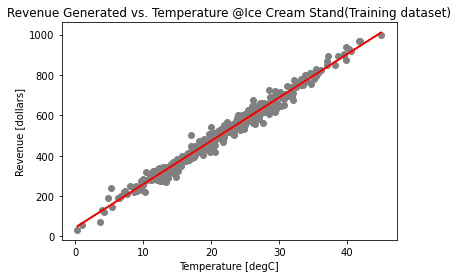

In [40]:
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_train, regressor.predict(x_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

Text(0.5, 1.0, 'Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

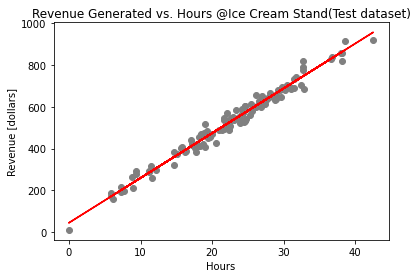

In [41]:
# VISUALIZE TEST SET RESULTS
plt.scatter(x_test, y_test, color = 'gray')
plt.plot(x_test, regressor.predict(x_test), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Hours')
plt.title('Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')